In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
df = pd.read_csv("otto.csv")

#Printing out number of instances and classes
icount = df["id"].count()
print("The exact number of instances is: ",icount)
classCount = df['target'].value_counts()
print("The exact number of classes is: ",classCount)

#Converted non-numerical classes to numerical
le = preprocessing.LabelEncoder()
we = le.fit_transform(df['target'])
df['target'] = we

#Filtering out rows with 0s
handle = False
for i in range(df["id"].count()):
    rowFilt = df.iloc[i]
    for y in range(rowFilt.count()):
        if y == 0:
            continue
        elif y == rowFilt.count():
            continue
        else:
            if rowFilt[y] == 0:
                handle = True
            else:
                handle = False
    if handle == True:
        df.drop(rowFilt,axis = 0)
    
#Training and testing data

y = df.loc[:,'target']
X = df.drop(['id','target'], axis = 1)
print(y)

            

    

The exact number of instances is:  61878
The exact number of classes is:  Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
61873    8
61874    8
61875    8
61876    8
61877    8
Name: target, Length: 61878, dtype: int64


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [3]:
#2.2 Algorithim impelementation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
pred4y1 = knn.predict(X_test)
f1_knn = f1_score(y_test,pred4y1, average = 'macro')
f1_knn

0.7227200537035081

In [4]:
from sklearn.ensemble import RandomForestClassifier
stuff = RandomForestClassifier(n_estimators = 3)
stuff.fit(X_train,y_train)
pred4y2 = stuff.predict(X_test)
f1_rfc = f1_score(y_test,pred4y2, average = 'macro')
f1_rfc


0.647208239807836

In [5]:
from sklearn.naive_bayes import GaussianNB
stuff2 = GaussianNB()
stuff2.fit(X_train,y_train)
pred4y3 = stuff2.predict(X_test)
f1_gnb = f1_score(y_test,pred4y3, average = 'macro')
f1_gnb


0.5366731773439437

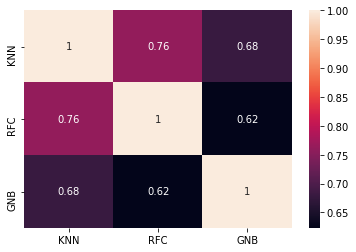

In [6]:
#Visualization of of pair-wise correlation of the three algos
import seaborn as sns
import pandas as pd

stuff3 = {'KNN': pred4y1,
           'RFC': pred4y2,
            'GNB': pred4y3}


buddy = pd.DataFrame(stuff3)
buddy
yo = sns.heatmap(buddy.corr(),annot = True)

# Analysis/Results

Based on the results I found for the f1 measure for knn, random forest and gaussian nb I found that knn had
the highest f1 measure being around 0.72, random forest having the second highest being around 0.64 and gaussian
having the lowest one being around 0.53. I can conclude that for the f1 measure knn is the best, random forest
comes second best and gaussian is last in terms of the scores I recieved. Therefore for this experiment KNN would
best fit the standards that need to be met for the experiment.
 

